In [1]:
from rouge_score import rouge_scorer

In [2]:
scorer = rouge_scorer.RougeScorer(['rouge1','rouge2', 'rougeL'], use_stemmer=True)

In [3]:
scores = scorer.score('The quick brown fox jumps over the lazy dog', 'The quick brown dog jumps on the log.')

In [4]:
print(scores["rouge2"])

Score(precision=0.2857142857142857, recall=0.25, fmeasure=0.26666666666666666)


In [5]:
import json

test_fp='../bai_AMR-Dialogue-main/DialogRG/workplace/log_5000_machine_annotation/with_graph_5000_test-40'
# test_fp='../bai_AMR-Dialogue-main/DialogRG/workplace/log_no_graph_5000_machine_annotation/test-40'
data = []
with open(test_fp) as f:
    for line in f:
        data.append(json.loads(line))

In [6]:
data[0]["pred"]

"ali@@ son is on the diet . she doesn ' t have any more ."

In [7]:
r1pre = []
r1rec = []
r1f = []
r2pre = []
r2rec = []
r2f = []
rLpre = []
rLrec = []
rLf = []
for i in data:
    scores = scorer.score(i["gold"], i["pred"])
    r1pre.append(scores["rouge1"][0])
    r1rec.append(scores["rouge1"][1])
    r1f.append(scores["rouge1"][2])
    
    r2pre.append(scores["rouge2"][0])
    r2rec.append(scores["rouge2"][1])
    r2f.append(scores["rouge2"][2])
    
    rLpre.append(scores["rougeL"][0])
    rLrec.append(scores["rougeL"][1])
    rLf.append(scores["rougeL"][2])
    
    
    

In [8]:
def avg(l):
    return sum(l)/len(l)
print("r1pre", avg(r1pre))
print("r1rec", avg(r1rec))
print("r1f", avg(r1f))
print("r2pre", avg(r2pre))
print("r2rec", avg(r2rec))
print("r2f", avg(r2f))
print("rLpre", avg(rLpre))
print("rLrec", avg(rLrec))
print("rLf", avg(rLf))

r1pre 0.4567431992554457
r1rec 0.395205558906467
r1f 0.4089634481237979
r2pre 0.23381365415735011
r2rec 0.20706752797990313
r2f 0.21163729529140654
rLpre 0.3954283628123123
rLrec 0.34537474318269984
rLf 0.35549533365475205


In [9]:
import numpy as np
print("r1pre", max(r1pre), np.argmax(np.array(r1pre)))
print("r1rec", max(r1rec), np.argmax(np.array(r1rec)))
print("r1f", max(r1f), np.argmax(np.array(r1f)))
print("rLpre", max(rLpre), np.argmax(np.array(rLpre)))
print("rLrec", max(rLrec), np.argmax(np.array(rLrec)))
print("rLf", max(rLf), np.argmax(np.array(rLf)))

r1pre 1.0 32
r1rec 1.0 5
r1f 1.0 32
rLpre 1.0 32
rLrec 1.0 5
rLf 1.0 32


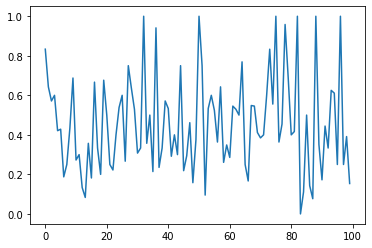

In [10]:
from matplotlib import pyplot as plt
plt.plot(r1pre)
plt.show()